In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
casting_data_dir = ('/content/drive/MyDrive/Colab Notebooks/casting_data/casting_data')
train_dir = ('/content/drive/MyDrive/Colab Notebooks/casting_data/casting_data/train')
test_dir = ('/content/drive/MyDrive/Colab Notebooks/casting_data/casting_data/test')
image_shape = (300,300,1)
batch_size = 32

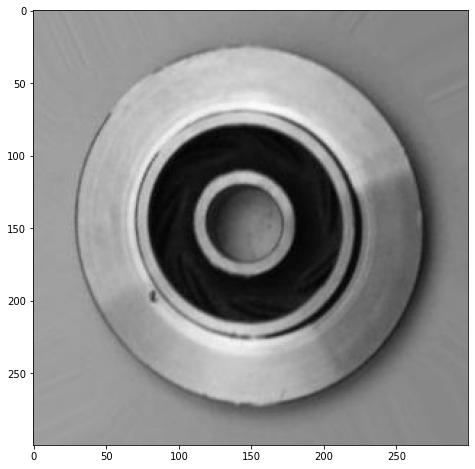

In [ ]:
# view some images
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/casting_data/casting_data/train/def_front/cast_def_0_0.jpeg')
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

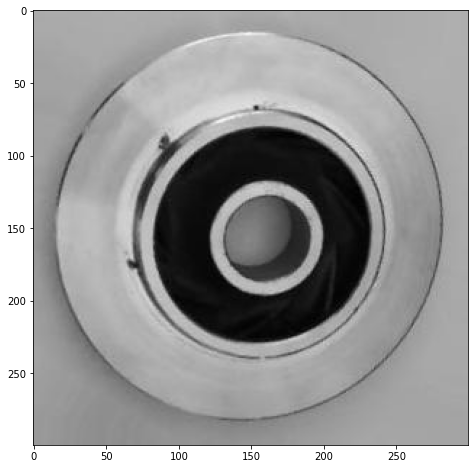

In [ ]:
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/casting_data/casting_data/test/def_front/cast_def_0_1137.jpeg')
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

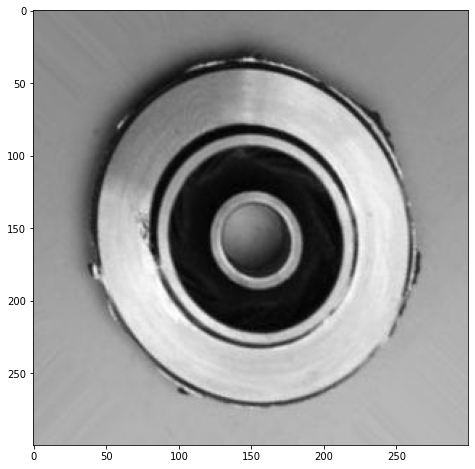

In [ ]:
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/casting_data/casting_data/test/def_front/cast_def_0_1507.jpeg')
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

Data Preparation 

In [ ]:
image_gen = ImageDataGenerator(rescale=1/255)# Rescale the image by normalzing it

In [ ]:
train_set = image_gen.flow_from_directory(train_dir,
                                               target_size=image_shape[:2],
                                                color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=True)

test_set = image_gen.flow_from_directory(test_dir,
                                               target_size=image_shape[:2],
                                               color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 6653 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [ ]:
train_set.class_indices

{'def_front': 0, 'ok_front': 1}

**Convolutional Neural Network Model**

In [15]:
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))




model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [16]:
model_train = model.fit_generator(train_set,epochs=20,
                              validation_data=test_set,
                             callbacks=[early_stop])

Epoch 1/20
208/208 [==============================] - 1870s 9s/step - loss: 0.5291 - accuracy: 0.7290 - val_loss: 0.3879 - val_accuracy: 0.7846
Epoch 2/20
208/208 [==============================] - 269s 1s/step - loss: 0.2700 - accuracy: 0.8913 - val_loss: 0.1628 - val_accuracy: 0.9469
Epoch 3/20
208/208 [==============================] - 269s 1s/step - loss: 0.1482 - accuracy: 0.9448 - val_loss: 0.0882 - val_accuracy: 0.9734
Epoch 4/20
208/208 [==============================] - 269s 1s/step - loss: 0.0900 - accuracy: 0.9696 - val_loss: 0.0602 - val_accuracy: 0.9846
Epoch 5/20
208/208 [==============================] - 267s 1s/step - loss: 0.0721 - accuracy: 0.9769 - val_loss: 0.0549 - val_accuracy: 0.9776
Epoch 6/20
208/208 [==============================] - 268s 1s/step - loss: 0.0464 - accuracy: 0.9877 - val_loss: 0.0341 - val_accuracy: 0.9916
Epoch 7/20
208/208 [==============================] - 268s 1s/step - loss: 0.0472 - accuracy: 0.9854 - val_loss: 0.0379 - val_accuracy: 0.979

**Analizing model performance**

In [17]:
losses = pd.DataFrame(model.history.history)

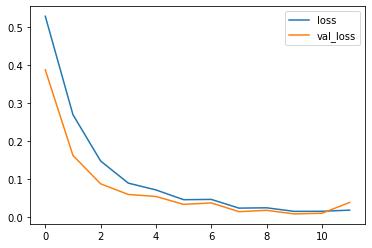

In [18]:
losses[['loss','val_loss']].plot()

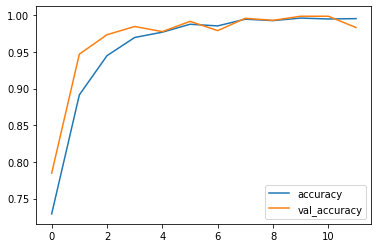

In [19]:
losses[['accuracy','val_accuracy']].plot()

In [20]:
#first we will find predict probability
pred_probability = model.predict_generator(test_set)

In [21]:
#here it's true label for test set
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
predictions = pred_probability > 0.5
#if model predict greater than 0.5 it conveted to 1 means ok_front

In [23]:
print(classification_report(test_set.classes,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       453
           1       0.96      1.00      0.98       262

    accuracy                           0.98       715
   macro avg       0.98      0.99      0.98       715
weighted avg       0.98      0.98      0.98       715



**Predict on some test images**

In [24]:
test_dir

'/content/drive/MyDrive/Colab Notebooks/casting_data/casting_data/test'

In [37]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/casting_data/casting_data/test/ok_front/cast_ok_0_1020.jpeg',0)
rescale = 1./255
pred_img =img.copy()

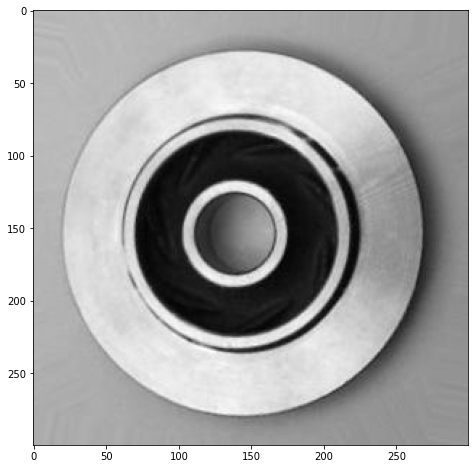

In [38]:
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

ok_front


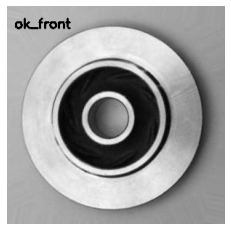

In [39]:
prediction = model.predict(img.reshape(-1,300,300,1))
if (prediction<0.5):
    print("def_front")
    cv2.putText(pred_img, "def_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("ok_front")
    cv2.putText(pred_img, "ok_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
plt.imshow(pred_img,cmap='gray')
plt.axis('off')
plt.show()

In [40]:
img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/casting_data/casting_data/test/def_front/cast_def_0_1134.jpeg',0)
rescale = 1./255
pred_img1 =img1.copy()

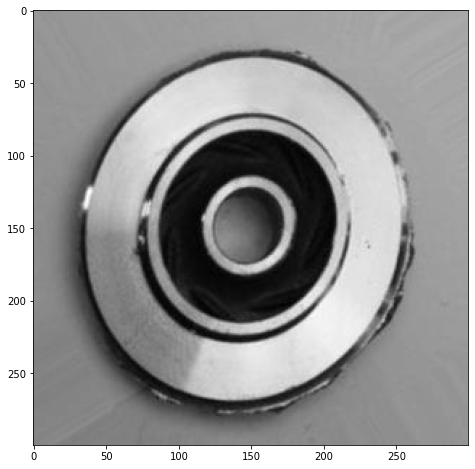

In [41]:
plt.figure(figsize=(12,8))
plt.imshow(img1,cmap='gray')

In [43]:
model.predict(img.reshape(1,300,300,1))

array([[1.]], dtype=float32)

def_front


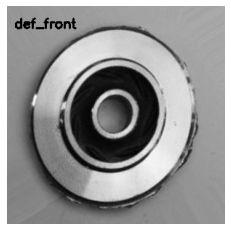

In [44]:
prediction = model.predict(img1.reshape(-1,300,300,1))
if (prediction<0.5):
    print("def_front")
    cv2.putText(pred_img1, "def_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("ok_front")
    cv2.putText(pred_img1, "ok_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
plt.imshow(pred_img1,cmap='gray')
plt.axis('off')
plt.show()

In [45]:
model.save('inspection_of_casting_products.h5')